In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/aryanmanchanda/Projects/aura-check/Data/DASS Responses/data.csv", delimiter="\t")
data.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  screensize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           1   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           2   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           2   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           2   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize       major  
0           2         NaN  
1           4         NaN  
2           3         NaN  
3           5     biology  
4           4  Psychology  

[5 rows x 172 columns]

In [4]:
questions = []
for i in data.columns:
    if i.startswith("Q") and i.endswith("A"):
        questions.append(i)

In [5]:
questions

['Q1A',
 'Q2A',
 'Q3A',
 'Q4A',
 'Q5A',
 'Q6A',
 'Q7A',
 'Q8A',
 'Q9A',
 'Q10A',
 'Q11A',
 'Q12A',
 'Q13A',
 'Q14A',
 'Q15A',
 'Q16A',
 'Q17A',
 'Q18A',
 'Q19A',
 'Q20A',
 'Q21A',
 'Q22A',
 'Q23A',
 'Q24A',
 'Q25A',
 'Q26A',
 'Q27A',
 'Q28A',
 'Q29A',
 'Q30A',
 'Q31A',
 'Q32A',
 'Q33A',
 'Q34A',
 'Q35A',
 'Q36A',
 'Q37A',
 'Q38A',
 'Q39A',
 'Q40A',
 'Q41A',
 'Q42A']

In [6]:
depression_questions = ["Q3A", "Q5A", "Q10A", "Q13A", "Q16A", "Q17A", "Q21A", "Q24A", "Q26A", "Q31A", "Q34A","Q37A", "Q38A", "Q42A"]
anxiety_questions = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A", "Q19A", "Q20A", "Q23A", "Q25A", "Q28A", "Q30A", "Q36A", "Q40A", "Q41A"]
stress_questions = ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A", "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"]

words = ["VCL1", "VCL2", "VCL3", "VCL4","VCL5", "VCL7", "VCL8", "VCL10", "VCL11", "VCL13", "VCL14", "VCL15", "VCL16"]

In [7]:
data["depression_score"] = data[depression_questions].sum(axis =1)
data["anxiety_score"] = data[anxiety_questions].sum(axis=1)
data["stress_score"] = data[stress_questions].sum(axis=1)

data["extraversion"] = data["TIPI1"] - data["TIPI6"]
data["agreeableness"] = data["TIPI7"] - data["TIPI2"]
data["conscientiousness"] = data["TIPI3"] - data["TIPI8"]
data["emotional_stability"] = data["TIPI9"] - data["TIPI4"]
data["openness"] = data["TIPI5"] - data["TIPI10"]

In [8]:
data.head(10)

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  familysize  \
0    4   28  3890    4   25  2122    2   16   1944    4  ...           2   
1    4    2  8118    1   36  2890    2   35   4777    3  ...           4   
2    3    7  5784    1   33  4373    4   41   3242    1  ...           3   
3    2   23  5081    3   11  6837    2   37   5521    1  ...           5   
4    2   36  3215    2   13  7731    3    5   4156    4  ...           4   
5    1   18  6116    1   28  3193    2    2  12542    1  ...           4   
6    1   20  4325    1   34  4009    2   38   3604    3  ...           4   
7    1   34  4796    1    9  2618    1   39   5823    1  ...           2   
8    4    4  3470    4   14  2139    3    1  11043    4  ...           4   
9    3   38  5187    2   28  2600    4    9   2015    1  ...           3   

                       major  depression_score  anxiety_score  stress_score  \
0                        NaN                41             48            54   
1                        NaN                38             31            41   
2                        NaN                53             26            31   
3                    biology                30             31            30   
4                 Psychology                46             54            43   
5                        NaN                27             20            26   
6  Mechatronics engeenerieng                45             33            28   
7                      Music                18             18            20   
8                Psychology                 49             53            47   
9       computer programming                56             42            48   

   extraversion  agreeableness  conscientiousness  emotional_stability  \
0            -6              2                  2                   -6   
1             2              2                 -3                   -6   
2            -4              0                 -3                    1   
3            -3              5                  6                    2   
4            -3              0                 -3                   -3   
5            -5              6                  4                    5   
6             0              1                  3                    0   
7             5              0                  1                    0   
8            -6              2                 -2                   -6   
9            -6             -6                  3                   -6   

   openness  
0         6  
1         0  
2         3  
3         5  
4         2  
5         0  
6        -2  
7         1  
8         1  
9        -2  

[10 rows x 180 columns]

In [9]:
def score(colname: str, data: pd.DataFrame) -> pd.DataFrame:
    for index, i in enumerate(data[colname]):
        if i <= 9:
            data.loc[index, colname] = 1
        elif 9 < i <= 13:
            data.loc[index, colname] = 2
        elif 13 < i <= 20:
            data.loc[index, colname] = 3
        elif 20 < i <= 27:
            data.loc[index, colname] = 4
        else:
            data.loc[index, colname] = 5
    return data[colname]

In [10]:
score("depression_score", data)
score("anxiety_score", data)
score("stress_score", data)

0        5
1        5
2        5
3        5
4        5
        ..
39770    5
39771    5
39772    3
39773    5
39774    5
Name: stress_score, Length: 39775, dtype: int64

In [11]:
data.head()

Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  familysize  \
0    4   28  3890    4   25  2122    2   16  1944    4  ...           2   
1    4    2  8118    1   36  2890    2   35  4777    3  ...           4   
2    3    7  5784    1   33  4373    4   41  3242    1  ...           3   
3    2   23  5081    3   11  6837    2   37  5521    1  ...           5   
4    2   36  3215    2   13  7731    3    5  4156    4  ...           4   

        major  depression_score  anxiety_score  stress_score  extraversion  \
0         NaN                 5              5             5            -6   
1         NaN                 5              5             5             2   
2         NaN                 5              4             5            -4   
3     biology                 5              5             5            -3   
4  Psychology                 5              5             5            -3   

   agreeableness  conscientiousness  emotional_stability  openness  
0              2                  2                   -6         6  
1              2                 -3                   -6         0  
2              0                 -3                    1         3  
3              5                  6                    2         5  
4              0                 -3                   -3         2  

[5 rows x 180 columns]

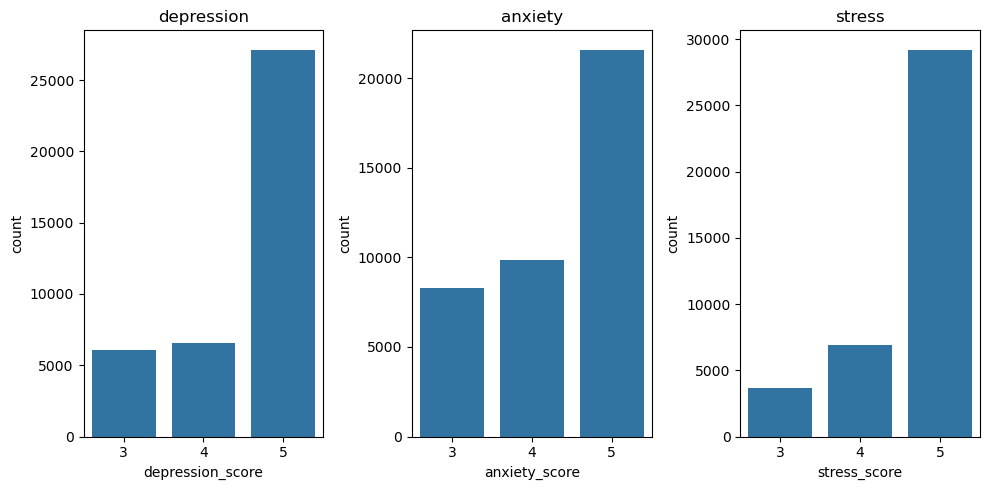

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.ravel()
sns.countplot(x = data["depression_score"],ax = axes[0])
axes[0].set_title("depression")
sns.countplot(x = data["anxiety_score"],ax = axes[1])
axes[1].set_title("anxiety")
sns.countplot(x = data["stress_score"],ax = axes[2])
axes[2].set_title("stress")
plt.tight_layout()

([<matplotlib.axis.XTick at 0x13f4eb7d0>,
 [Text(0, 0, 'LessthanHigh'),
  Text(1, 0, 'HighSchool'),
  Text(2, 0, 'University'),
  Text(3, 0, 'Graduate')])

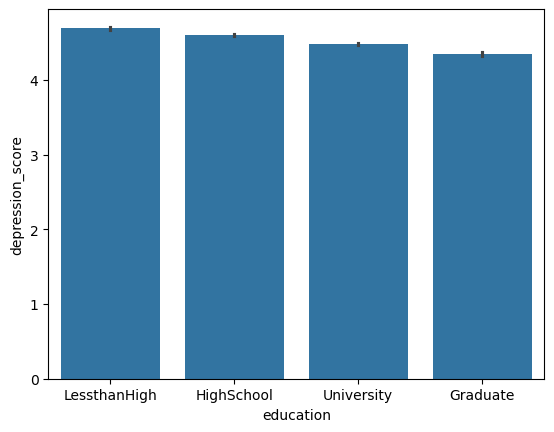

In [13]:
sns.barplot(x="education", y="depression_score", data=data[data["education"] != 0])
plt.xticks(ticks = range(len(data[data["education"] != 0]["education"].unique())), labels = ["LessthanHigh", "HighSchool", "University", "Graduate"])

([<matplotlib.axis.XTick at 0x13f0d2910>,
 [Text(0, 0, 'Single'), Text(1, 0, 'Married'), Text(2, 0, 'Divorced')])

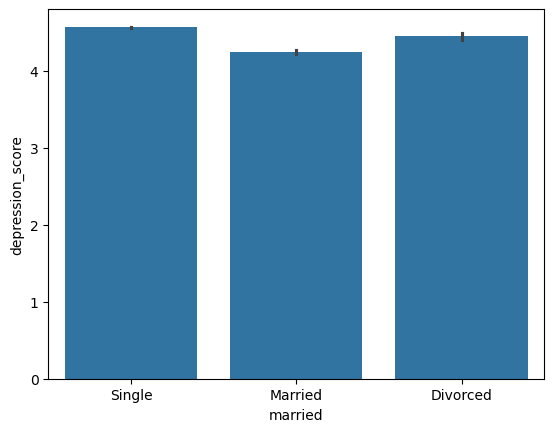

In [14]:
sns.barplot(x="married", y="depression_score", data=data[data["married"] != 0])
plt.xticks(ticks = range(len(data[data["married"] != 0]["married"].unique())), labels = ["Single", "Married", "Divorced"])

<Axes: xlabel='religion', ylabel='depression_score'>

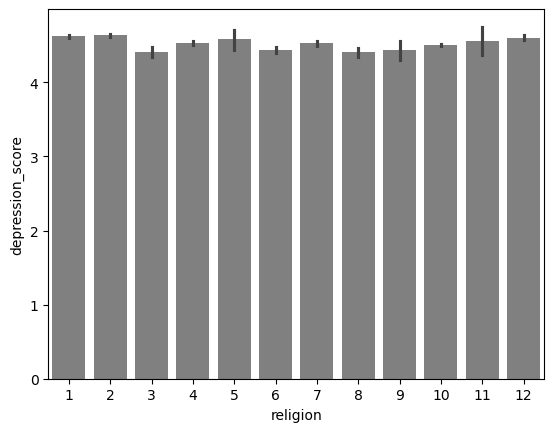

In [15]:
sns.barplot(data = data[data["religion"] != 0], x = "religion", y = "depression_score", color = "grey")

([<matplotlib.axis.XTick at 0x13f1c3710>,
 [Text(0, 0, 'Hetero'),
  Text(1, 0, 'Bi'),
  Text(2, 0, 'Homo'),
  Text(3, 0, 'A'),
  Text(4, 0, 'Other')])

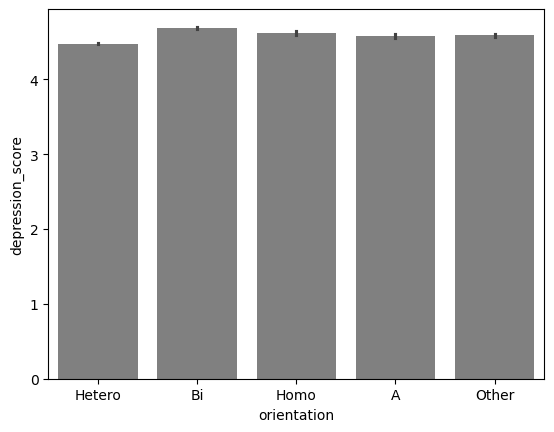

In [16]:
sns.barplot(data = data[data["orientation"] != 0], x = "orientation", y= "depression_score", color = "grey")
plt.xticks(ticks = range(len(data[data["orientation"] != 0]["orientation"].unique())), labels = ["Hetero", "Bi", "Homo", "A", "Other"])

In [17]:
dropped_questions = ["country", "source", "introelapse", "testelapse", "surveyelapse", "screensize", "uniquenetworklocation"]
for i in data.columns:
    if i.startswith("Q") and (i.endswith("I") or i.endswith("E")):
        dropped_questions.append(i)

data = data.drop(dropped_questions, axis=1)

In [18]:
categories = []
for label, item in data.items():
    if pd.api.types.is_object_dtype(item):
        categories.append(label)

In [19]:
numericals = []
for label, item in data.items():
    if pd.api.types.is_int64_dtype(item):
        numericals.append(label)

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_12594/3480842869.py:3: DeprecationWarning: is_int64_dtype is deprecated and will be removed in a future version. Use dtype == np.int64 instead.
  if pd.api.types.is_int64_dtype(item):


In [20]:
data_copy = data.copy()

In [21]:
data_copy.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'race', 'voted', 'married', 'familysize', 'major', 'depression_score',
       'anxiety_score', 'stress_score', 'extraversion', 'agreeableness',
       'conscientiousness', 'emotional_stability', 'openness'],
      dtype='object')

In [22]:
import pickle

data_copy = pd.get_dummies(data, columns=categories)
with open('onehot_columns.pkl', 'wb') as f:
    pickle.dump(data_copy.columns, f)

In [23]:
data_copy.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       ...
       'major_virology', 'major_visual arts', 'major_visual arts and culture',
       'major_water engineering', 'major_web design', 'major_web development',
       'major_writing', 'major_writing ', 'major_yes', 'major_zoology'],
      dtype='object', length=5396)

In [24]:
data_copy

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  major_virology  \
0        4    4    2    4    4    4    4    4    2     1  ...           False   
1        4    1    2    3    4    4    3    4    3     2  ...           False   
2        3    1    4    1    4    3    1    3    2     4  ...           False   
3        2    3    2    1    3    3    4    2    3     3  ...           False   
4        2    2    3    4    4    2    4    4    4     3  ...           False   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...             ...   
39770    2    1    3    2    3    2    1    3    1     4  ...           False   
39771    3    4    3    4    3    4    4    4    3     4  ...           False   
39772    2    1    2    1    1    1    1    1    2     1  ...           False   
39773    3    1    2    2    3    3    3    4    3     1  ...           False   
39774    2    1    2    1    4    2    1    1    1     1  ...           False   

       major_visual arts  major_visual arts and culture  \
0                  False                          False   
1                  False                          False   
2                  False                          False   
3                  False                          False   
4                  False                          False   
...                  ...                            ...   
39770              False                          False   
39771              False                          False   
39772              False                          False   
39773              False                          False   
39774              False                          False   

       major_water engineering  major_web design  major_web development  \
0                        False             False                  False   
1                        False             False                  False   
2                        False             False                  False   
3                        False             False                  False   
4                        False             False                  False   
...                        ...               ...                    ...   
39770                    False             False                  False   
39771                    False             False                  False   
39772                    False             False                  False   
39773                    False             False                  False   
39774                    False             False                  False   

       major_writing  major_writing   major_yes  major_zoology  
0              False           False      False          False  
1              False           False      False          False  
2              False           False      False          False  
3              False           False      False          False  
4              False           False      False          False  
...              ...             ...        ...            ...  
39770          False           False      False          False  
39771          False           False      False          False  
39772          False           False      False          False  
39773          False           False      False          False  
39774          False           False      False          False  

[39775 rows x 5396 columns]

In [25]:
scores = ["depression_score", "anxiety_score", "stress_score"]

In [26]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_copy, test_size=0.2)

In [58]:
train_data_scores = train_data[scores]

In [59]:
train_data_scores

depression_score  anxiety_score  stress_score
2825                  5              5             5
37286                 5              3             5
21810                 4              4             4
24101                 5              5             5
25327                 4              3             4
...                 ...            ...           ...
16819                 4              4             5
25137                 5              5             5
33174                 5              5             5
30076                 5              4             5
330                   5              5             5

[31820 rows x 3 columns]

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data_scores["depression_score"] = le.fit_transform(train_data_scores["depression_score"])
train_data_scores["anxiety_score"] = le.fit_transform(train_data_scores["anxiety_score"])
train_data_scores["stress_score"] = le.fit_transform(train_data_scores["stress_score"])

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_5303/4156877122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_scores["depression_score"] = le.fit_transform(train_data_scores["depression_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_5303/4156877122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_scores["anxiety_score"] = le.fit_transform(train_data_scores["anxiety_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_5303/41568771

In [61]:
X = train_data.drop(scores, axis=1)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31820 entries, 2825 to 330
Columns: 5393 entries, Q1A to major_zoology
dtypes: bool(5308), int64(85)
memory usage: 182.0 MB


In [63]:
depression_y = train_data_scores["depression_score"]
anxiety_y = train_data_scores["anxiety_score"]
stress_y = train_data_scores["stress_score"]

## For Predicting Depression

In [64]:
X
depression_y

2825     2
37286    2
21810    1
24101    2
25327    1
        ..
16819    1
25137    2
33174    2
30076    2
330      2
Name: depression_score, Length: 31820, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, depression_y_train, depression_y_test = train_test_split(X, depression_y, test_size=0.2, random_state=42)

In [66]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train, depression_y_train)
clf.score(X_test, depression_y_test)

0.9773727215587681

In [67]:
depression_preds = clf.predict(X_test)
depression_preds[:10]

array([0, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(depression_preds, depression_y_test)

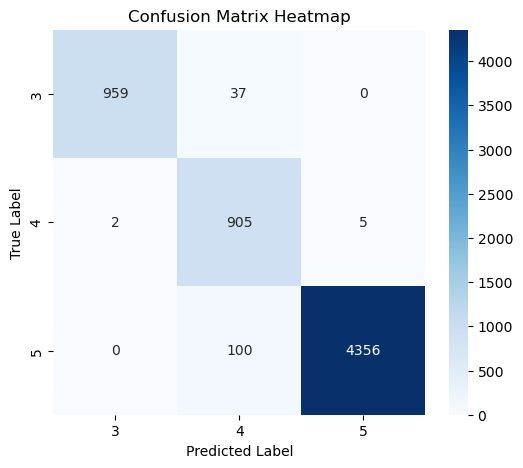

In [69]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [70]:
print(classification_report(depression_preds, depression_y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       996
           1       0.87      0.99      0.93       912
           2       1.00      0.98      0.99      4456

    accuracy                           0.98      6364
   macro avg       0.96      0.98      0.96      6364
weighted avg       0.98      0.98      0.98      6364



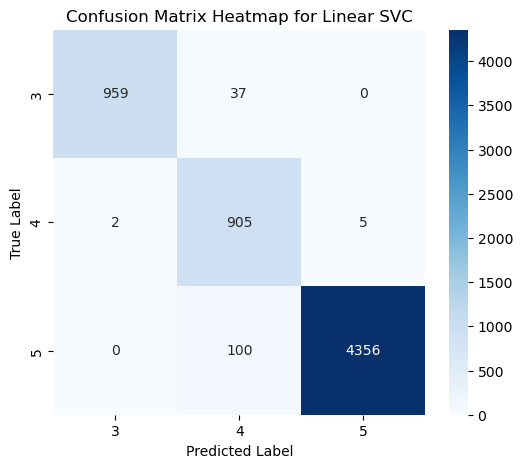

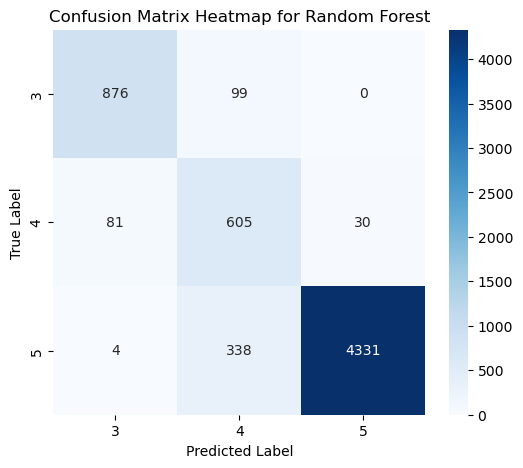

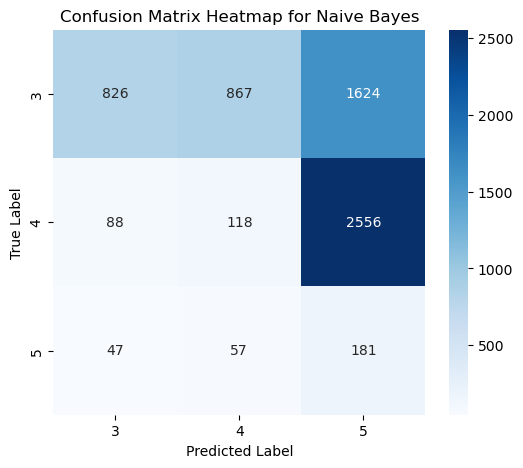

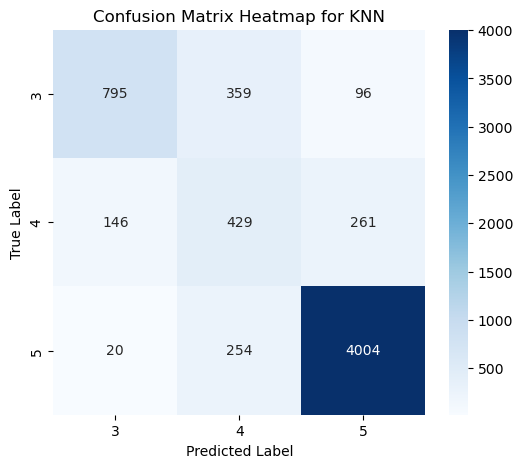

/Users/aryanmanchanda/Projects/aura-check/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


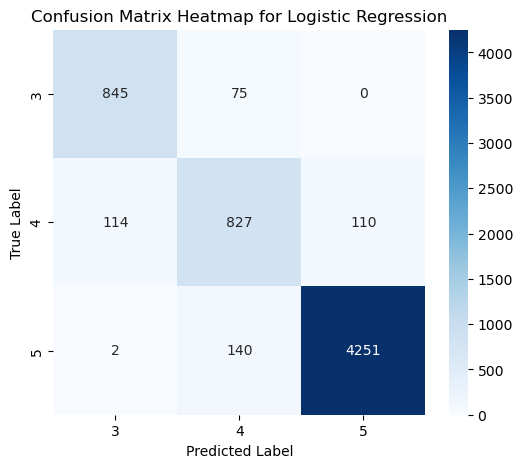

In [71]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {"Linear SVC": LinearSVC(), "Random Forest": RandomForestClassifier(), "Naive Bayes": GaussianNB(), "KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression()}
model_scores = {}

for name, model in  models.items():
    model.fit(X_train, depression_y_train)
    b = model.score(X_test, depression_y_test)
    model_scores[name] = b
    a = model.predict(X_test)
    conf = confusion_matrix(a, depression_y_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()

In [72]:
model_scores

{'Linear SVC': 0.9773727215587681,
 'Random Forest': 0.9132620993086109,
 'Naive Bayes': 0.17677561282212445,
 'KNN': 0.8214959145191704,
 'Logistic Regression': 0.9307039597737272}

In [73]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, depression_y_train)
xgc.score(X_test, depression_y_test)

0.9791011942174733

In [74]:
depression_preds_xgc = xgc.predict(X_test)

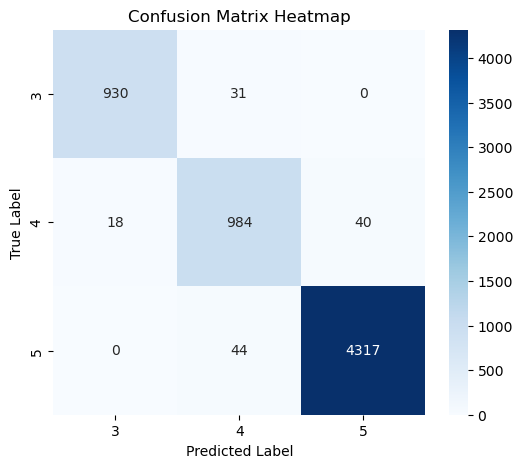

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_pred=depression_preds_xgc, y_true=depression_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [76]:
print(classification_report(depression_y_test, depression_preds_xgc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       961
           1       0.93      0.94      0.94      1042
           2       0.99      0.99      0.99      4361

    accuracy                           0.98      6364
   macro avg       0.97      0.97      0.97      6364
weighted avg       0.98      0.98      0.98      6364



In [77]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_depression.pkl", "wb"))

## Anxiety Prediction

In [78]:
X
anxiety_y

2825     2
37286    0
21810    1
24101    2
25327    0
        ..
16819    1
25137    2
33174    2
30076    1
330      2
Name: anxiety_score, Length: 31820, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, anxiety_y_train, anxiety_y_test = train_test_split(X, anxiety_y, test_size=0.2)

In [80]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, anxiety_y_train)
xgc.score(X_test, anxiety_y_test)

0.9723444374607165

In [81]:
anxiety_preds = xgc.predict(X_test)

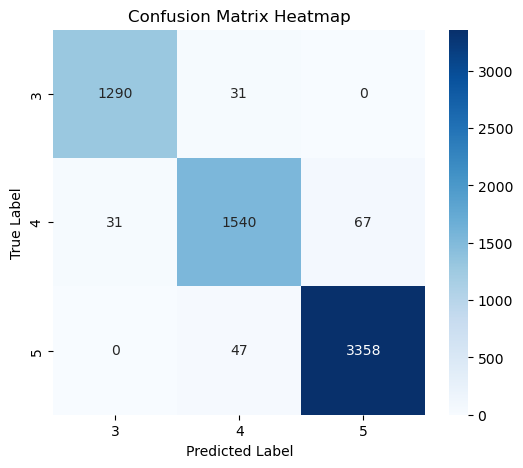

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(anxiety_preds, anxiety_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [83]:
print(classification_report(anxiety_y_test, anxiety_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1321
           1       0.94      0.95      0.95      1618
           2       0.99      0.98      0.98      3425

    accuracy                           0.97      6364
   macro avg       0.97      0.97      0.97      6364
weighted avg       0.97      0.97      0.97      6364



In [84]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_anxiety.pkl", "wb"))

## Stress Prediction

In [85]:
X
stress_y

2825     2
37286    2
21810    1
24101    2
25327    1
        ..
16819    2
25137    2
33174    2
30076    2
330      2
Name: stress_score, Length: 31820, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, stress_y_train, stress_y_test = train_test_split(X, stress_y, test_size=0.2)

In [87]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train, stress_y_train)
xgc.score(X_test, stress_y_test)

0.9800439974858579

In [88]:
stress_preds = xgc.predict(X_test)

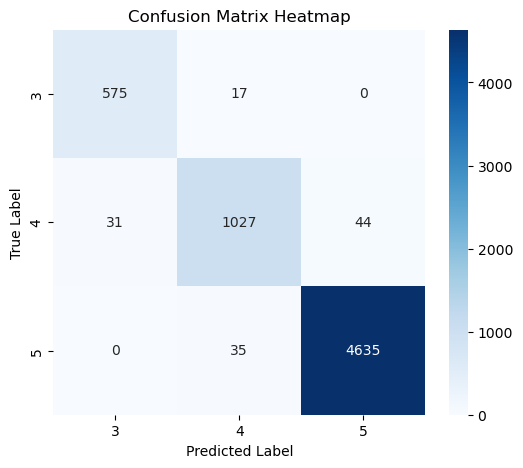

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(stress_preds, stress_y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [90]:
print(classification_report(stress_y_test, stress_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       606
           1       0.93      0.95      0.94      1079
           2       0.99      0.99      0.99      4679

    accuracy                           0.98      6364
   macro avg       0.97      0.96      0.96      6364
weighted avg       0.98      0.98      0.98      6364



In [91]:
import pickle

pickle.dump(xgc, open("../models/xgc_model1_stress.pkl", "wb"))

## Testing

In [27]:
test_data

Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  major_virology  \
8727     4    2    4    2    4    4    2    4    4     4  ...           False   
24487    2    1    2    1    4    2    1    1    1     1  ...           False   
19341    2    1    3    1    3    2    1    2    4     4  ...           False   
11205    2    1    1    1    2    1    1    1    1     2  ...           False   
10059    2    1    3    1    1    3    1    2    4     3  ...           False   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...             ...   
16657    4    3    4    4    4    4    4    4    4     3  ...           False   
17862    4    4    4    3    3    4    2    2    4     2  ...           False   
24259    3    4    3    2    2    2    2    2    4     2  ...           False   
32712    2    3    1    1    2    4    1    2    1     1  ...           False   
1698     1    1    1    2    1    1    2    3    1     1  ...           False   

       major_visual arts  major_visual arts and culture  \
8727               False                          False   
24487              False                          False   
19341              False                          False   
11205              False                          False   
10059              False                          False   
...                  ...                            ...   
16657              False                          False   
17862              False                          False   
24259              False                          False   
32712              False                          False   
1698               False                          False   

       major_water engineering  major_web design  major_web development  \
8727                     False             False                  False   
24487                    False             False                  False   
19341                    False             False                  False   
11205                    False             False                  False   
10059                    False             False                  False   
...                        ...               ...                    ...   
16657                    False             False                  False   
17862                    False             False                  False   
24259                    False             False                  False   
32712                    False             False                  False   
1698                     False             False                  False   

       major_writing  major_writing   major_yes  major_zoology  
8727           False           False      False          False  
24487          False           False      False          False  
19341          False           False      False          False  
11205          False           False      False          False  
10059          False           False      False          False  
...              ...             ...        ...            ...  
16657          False           False      False          False  
17862          False           False      False          False  
24259          False           False      False          False  
32712          False           False      False          False  
1698           False           False      False          False  

[7955 rows x 5396 columns]

In [28]:
X = test_data.drop(scores, axis=1)

In [29]:
test_data_scores = test_data[scores]
test_data_scores

depression_score  anxiety_score  stress_score
8727                  5              5             5
24487                 5              4             4
19341                 5              4             5
11205                 4              3             3
10059                 5              4             5
...                 ...            ...           ...
16657                 5              5             5
17862                 5              5             5
24259                 5              5             5
32712                 3              4             5
1698                  3              4             5

[7955 rows x 3 columns]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_data_scores["depression_score"] = le.fit_transform(test_data_scores["depression_score"])
test_data_scores["anxiety_score"] = le.fit_transform(test_data_scores["anxiety_score"])
test_data_scores["stress_score"] = le.fit_transform(test_data_scores["stress_score"])

/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_12594/308710127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_scores["depression_score"] = le.fit_transform(test_data_scores["depression_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_12594/308710127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_scores["anxiety_score"] = le.fit_transform(test_data_scores["anxiety_score"])
/var/folders/pd/hd4ggfd92s96hw2m79cprk4h0000gn/T/ipykernel_12594/308710127.p

In [31]:
test_data_scores

depression_score  anxiety_score  stress_score
8727                  2              2             2
24487                 2              1             1
19341                 2              1             2
11205                 1              0             0
10059                 2              1             2
...                 ...            ...           ...
16657                 2              2             2
17862                 2              2             2
24259                 2              2             2
32712                 0              1             2
1698                  0              1             2

[7955 rows x 3 columns]

In [32]:
test_depression = test_data_scores["depression_score"]
test_anxiety = test_data_scores["anxiety_score"]
test_stress = test_data_scores["stress_score"]

In [33]:
import pickle

model = pickle.load(open("../models/xgc_model1_anxiety.pkl", 'rb'))

In [34]:
test_preds_anxiety = model.predict(X)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef

print(classification_report(test_anxiety, test_preds_anxiety))
print(matthews_corrcoef(y_true=test_anxiety, y_pred=test_preds_anxiety))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1622
           1       0.98      0.98      0.98      2078
           2       1.00      0.99      0.99      4255

    accuracy                           0.99      7955
   macro avg       0.99      0.99      0.99      7955
weighted avg       0.99      0.99      0.99      7955

0.9839964452052146


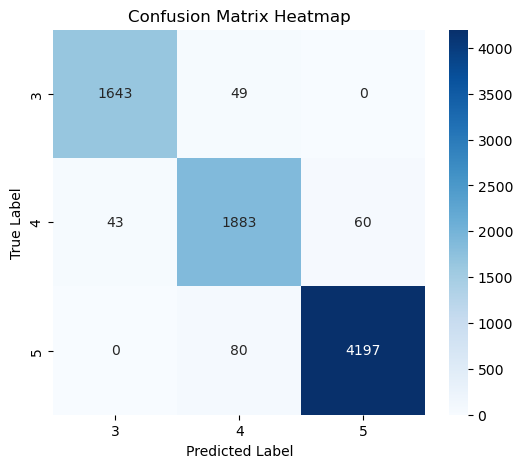

In [101]:
conf = confusion_matrix(y_true=test_anxiety, y_pred=test_preds_anxiety)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1259
           1       0.98      0.98      0.98      1328
           2       1.00      1.00      1.00      5368

    accuracy                           0.99      7955
   macro avg       0.99      0.99      0.99      7955
weighted avg       0.99      0.99      0.99      7955


0.9879794870927116



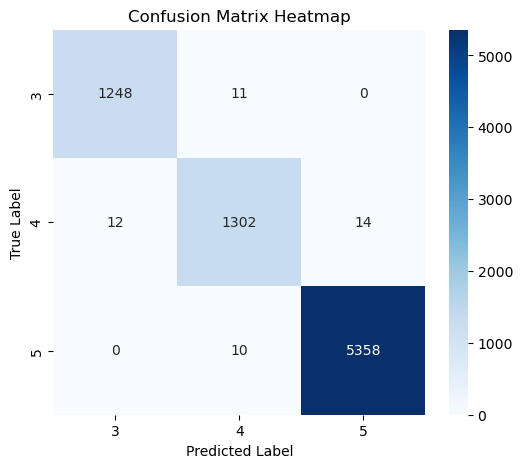

In [40]:
import pickle

model = pickle.load(open("../models/xgc_model1_depression.pkl", 'rb'))

test_preds_depression = model.predict(X)

from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef

print(classification_report(test_depression, test_preds_depression))
print()
print(matthews_corrcoef(y_true=test_depression, y_pred=test_preds_depression))
print()
conf = confusion_matrix(y_true=test_depression, y_pred=test_preds_depression)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       759
           1       0.98      0.98      0.98      1379
           2       1.00      1.00      1.00      5817

    accuracy                           0.99      7955
   macro avg       0.98      0.99      0.99      7955
weighted avg       0.99      0.99      0.99      7955


0.9823431267926535



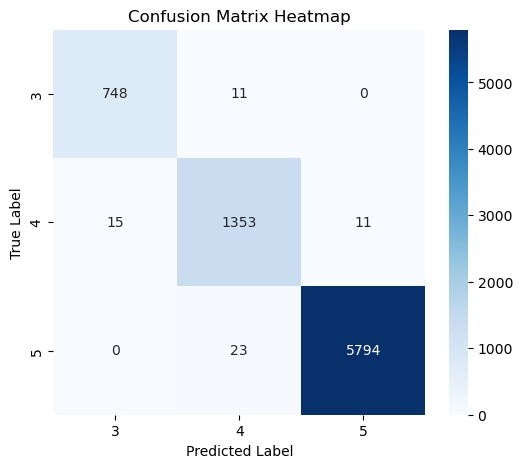

In [37]:
import pickle

model = pickle.load(open("../models/xgc_model1_stress.pkl", 'rb'))

test_preds_stress = model.predict(X)

from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef

print(classification_report(test_stress, test_preds_stress))
print()
print(matthews_corrcoef(y_true=test_stress, y_pred=test_preds_stress))
print()
conf = confusion_matrix(y_true=test_stress, y_pred=test_preds_stress)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()